<a href="https://colab.research.google.com/github/zsomborgyorfitoth/LU_BAP_CIR/blob/main/tutorial_quantitative_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 0 — Welcome & Objectives - Quantitative Analysis

## What is Data Science?

Data science is the process of:
- Collecting data
- Cleaning it
- Analysing it
- Extracting insights
- Supporting better decisions

Today we will:

- Work with real UK electricity emissions data
- Clean and explore data
- Visualise sustainability trends
- Estimate a simple regression model
- Interpret results for business and policy decisions

No prior coding experience required.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

TARGET_FOLDER = "Python_Quant_Tutorial_2026"
BASE_PATH = "/content/drive/MyDrive"

folder_path = None

for root, dirs, files in os.walk(BASE_PATH):
    if TARGET_FOLDER in dirs:
        folder_path = os.path.join(root, TARGET_FOLDER)
        break

if folder_path is None:
    raise FileNotFoundError(
        f"Folder '{TARGET_FOLDER}' not found in your Drive.\n"
        "Make sure you added the shared folder to 'My Drive'."
    )

print("Folder found at:", folder_path)


Folder found at: /content/drive/MyDrive/Python_Quant_Tutorial_2026


# CHAPTER 1 — Setup

In [ ]:
# Import core libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


### What do these libraries do?

- pandas → handle data tables (DataFrames)
- numpy → numerical operations
- matplotlib → plotting
- seaborn → improved visualisation
- statsmodels → econometric models


## What Are We Doing?

We have multiple government Excel files.

Each file:
- Represents one year
- Contains a sheet related to UK electricity
- Contains:
    - A "Year" label
    - A CO2 intensity variable
    - The numeric value below each label

Our goal:

Automatically extract Year + Emissions  
Combine into one clean dataset  
Analyse sustainability trends


# CHAPTER 2 — Data Inspection

---



In [ ]:
files = [
    f for f in os.listdir(folder_path)
    if f.startswith("ghg-conversion-factors") and f.endswith(".xlsx")
]

if len(files) == 0:
    raise FileNotFoundError("No Excel files found in folder.")

print("Excel files found:")
for f in files:
    print(" -", f)



Excel files found:
 - ghg-conversion-factors-2025-condensed-set.xlsx
 - ghg-conversion-factors-2024-condensed_set.xlsx
 - ghg-conversion-factors-2023-condensed-set.xlsx
 - ghg-conversion-factors-2022-condensed-set.xlsx
 - ghg-conversion-factors-2021-condensed-set.xlsx
 - ghg-conversion-factors-2020-condensed-set.xlsx
 - ghg-conversion-factors-2019-condensed-set.xlsx
 - ghg-conversion-factors-2018-condensed-set.xlsx
 - ghg-conversion-factors-2017-condensed-set.xlsx
 - ghg-conversion-factors-2016-condensed-set.xlsx
 - ghg-conversion-factors-2015-condensed-set.xlsx
 - ghg-conversion-factors-2014-condensed-set.xlsx


These are the files we will process.
⌛

#CHAPTER 3 — Extract Data from Each File

In [ ]:
data_list = []

for file_name in files:

    file_path = os.path.join(folder_path, file_name)

    try:
        # Load sheet names
        xls = pd.ExcelFile(file_path, engine="openpyxl")

        # Automatically detect electricity sheet
        sheet_candidates = [s for s in xls.sheet_names if "electricity" in s.lower()]

        if not sheet_candidates:
            print(f"No electricity sheet found in {file_name}")
            continue

        sheet_name = sheet_candidates[0]

        df_excel = pd.read_excel(
            file_path,
            sheet_name=sheet_name,
            engine="openpyxl",
            header=None
        )

        # Convert to lowercase string for searching
        df_str = df_excel.astype(str).apply(lambda x: x.str.lower())

        # Locate Year cell
        year_location = np.where(df_str == "year")

        # Locate emissions cell (flexible search)
        emissions_location = np.where(
            df_str.apply(lambda col: col.str.contains("kg", na=False) & col.str.contains("co2", na=False))
        )

        if len(year_location[0]) > 0 and len(emissions_location[0]) > 0:

            year_row, year_col = year_location[0][0], year_location[1][0]
            emissions_row, emissions_col = emissions_location[0][0], emissions_location[1][0]

            year_value = df_excel.iloc[year_row + 1, year_col]
            emissions_value = df_excel.iloc[emissions_row + 1, emissions_col]

            data_list.append({
                "Year": int(year_value),
                "Emissions_Intensity": float(emissions_value)
            })

            print(f"Extracted from {file_name}")

        else:
            print(f"Labels not found in {file_name}")

    except Exception as e:
        print(f"Error reading {file_name}: {repr(e)}")

# Create structured dataset
df = pd.DataFrame(data_list).sort_values("Year").reset_index(drop=True)

df


Extracted from ghg-conversion-factors-2025-condensed-set.xlsx
Extracted from ghg-conversion-factors-2024-condensed_set.xlsx
Extracted from ghg-conversion-factors-2023-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #N/A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2022-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #N/A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2021-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2020-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2019-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2018-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2017-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2016-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2015-condensed-set.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'What''s new'!$A:$M.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Extracted from ghg-conversion-factors-2014-condensed-set.xlsx


,Year,Emissions_Intensity
0,2014,0.494260
1,2015,0.462190
2,2016,0.412050
3,2017,0.351560
4,2018,0.283070
5,2019,0.255600
6,2020,0.233140
7,2021,0.212330
8,2022,0.193380
9,2023,0.207074


# CHAPTER 4 — Clean Data

In [ ]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Emissions_Intensity"] = pd.to_numeric(df["Emissions_Intensity"], errors="coerce")

df = df.dropna()

df

,Year,Emissions_Intensity
0,2014,0.494260
1,2015,0.462190
2,2016,0.412050
3,2017,0.351560
4,2018,0.283070
5,2019,0.255600
6,2020,0.233140
7,2021,0.212330
8,2022,0.193380
9,2023,0.207074


Now we have a clean structured dataset:

Year | Emissions_Intensity ⚡

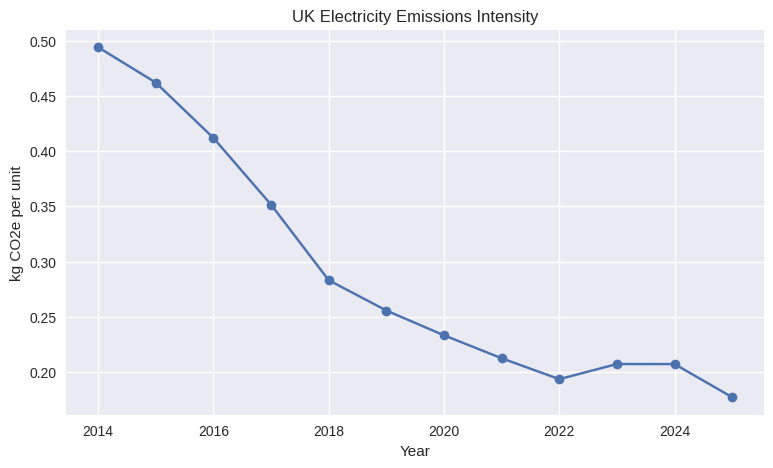

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(df["Year"], df["Emissions_Intensity"], marker='o')
plt.title("UK Electricity Emissions Intensity")
plt.xlabel("Year")
plt.ylabel("kg CO2e per unit")
plt.show()


Discussion Questions:

- When does decarbonisation accelerate?
- What policy events might explain this?
- Is decline linear?


# CHAPTER 6 — Data Transformation

**Annual Change**

In [ ]:
df["Annual_Change"] = df["Emissions_Intensity"].diff()
df

,Year,Emissions_Intensity,Annual_Change
0,2014,0.494260,NaN
1,2015,0.462190,-0.032070
2,2016,0.412050,-0.050140
3,2017,0.351560,-0.060490
4,2018,0.283070,-0.068490
5,2019,0.255600,-0.027470
6,2020,0.233140,-0.022460
7,2021,0.212330,-0.020810
8,2022,0.193380,-0.018950
9,2023,0.207074,0.013694


**Percentage Change**

In [ ]:
df["Pct_Change"] = df["Emissions_Intensity"].pct_change() * 100
df

,Year,Emissions_Intensity,Annual_Change,Pct_Change
0,2014,0.494260,NaN,NaN
1,2015,0.462190,-0.032070,-6.488488
2,2016,0.412050,-0.050140,-10.848352
3,2017,0.351560,-0.060490,-14.680257
4,2018,0.283070,-0.068490,-19.481739
5,2019,0.255600,-0.027470,-9.704313
6,2020,0.233140,-0.022460,-8.787167
7,2021,0.212330,-0.020810,-8.925967
8,2022,0.193380,-0.018950,-8.924787
9,2023,0.207074,0.013694,7.081543


# CHAPTER 7 — Simple Trend Regression

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df["Year"])
y = df["Emissions_Intensity"]

model = sm.OLS(y, X).fit()

print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Emissions_Intensity   R-squared:                       0.872
Model:                             OLS   Adj. R-squared:                  0.859
Method:                  Least Squares   F-statistic:                     67.86
Date:                 Tue, 17 Feb 2026   Prob (F-statistic):           9.10e-06
Time:                         17:32:10   Log-Likelihood:                 22.149
No. Observations:                   12   AIC:                            -40.30
Df Residuals:                       10   BIC:                            -39.33
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5210      7.069      8.27

Interpretation:

- Coefficient on Year → Average annual reduction
- P-value → Is trend statistically significant?
- R-squared → How much does time explain emissions?


# CHAPTER 8 — Structural Break (Policy Dummy)

In [ ]:
df["Post2015"] = (df["Year"] >= 2016).astype(int)

X2 = sm.add_constant(df[["Year", "Post2015"]])
y2 = df["Emissions_Intensity"]

model2 = sm.OLS(y2, X2).fit()

print(model2.summary())


                             OLS Regression Results                            
Dep. Variable:     Emissions_Intensity   R-squared:                       0.928
Model:                             OLS   Adj. R-squared:                  0.913
Method:                  Least Squares   F-statistic:                     58.42
Date:                 Tue, 17 Feb 2026   Prob (F-statistic):           7.00e-06
Time:                         17:32:14   Log-Likelihood:                 25.661
No. Observations:                   12   AIC:                            -45.32
Df Residuals:                        9   BIC:                            -43.87
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9445      7.280      6.31

Interpretation:

If Post2015 coefficient is negative and significant:

→ Decarbonisation accelerated after 2015.


# CHAPTER 9 — Key Learning Points

## What Students Learned

1. Government data is messy
2. File formats vary
3. Automation is essential
4. Sustainability trends can be quantified
5. Regression helps test policy impact

Data → Cleaning → Structuring → Analysis → Policy Insight
